<h1>Regression Error Characteristic (REC) curve -- Python</h1>

Please refer to paper for full explanation about REC https://pdfs.semanticscholar.org/2acd/f559300dd37f235642c0dbdbfe1d7118b250.pdf

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def REC(y_true, y_pred, error_start=0.0, error_interval = 0.2):
    """
    This function can be used for Regression Error Characteristic (REC) curves.
    args: y_true, y_pred, error_tolerance start (default=0.0), error_tolerance interval (default=0.2)
    
    returns: dictionary of epsilon array and the corresponding accuracy list            
    """
    
    n_sample = len(y_true) # the number of samples
    errors = abs(np.array(y_true) - y_pred) # "absolute error", could change to "squared error"
    error_end = errors.max() # take the maximum error as the end value of epsilon range
    
    # the list of epislon -- the x-axis of REC plot
    epsilon = np.arange(error_start, error_end, error_interval)
    
    n_correct = []
    accuracy = []
    for num in epsilon:
        for i in range(n_sample):
            if errors[i] <= num: 
                n_correct.append(i)
        accuracy.append(len(n_correct)/n_sample)
        n_correct = []

    return {"Epsilon": epsilon, "Accuracy": accuracy}

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

In [4]:
boston = load_boston()
X = boston.data
y = boston.target

In [5]:
lgr = LinearRegression()
y_pred = cross_val_predict(lgr, X, y, cv=10)

In [6]:
rec = REC(y, y_pred)
epsilon = rec["Epsilon"]
accuracy = rec["Accuracy"]

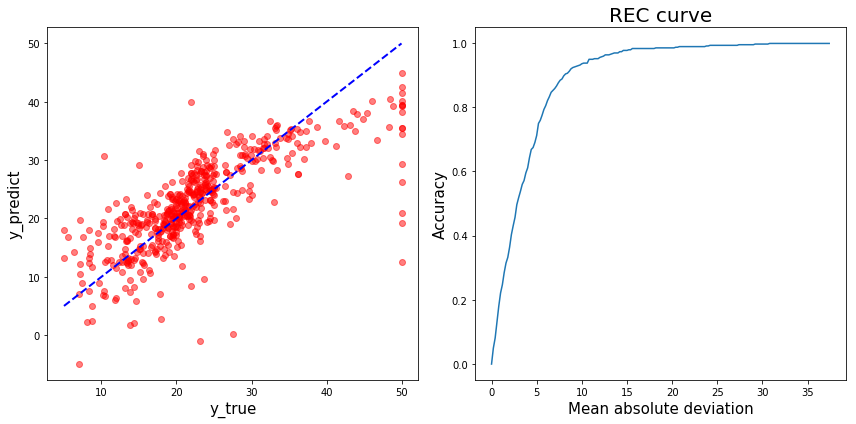

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].scatter(y, y_pred, color='red', alpha=0.5)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='blue')
axes[0].set_xlabel('y_true', fontsize=15)
axes[0].set_ylabel('y_predict', fontsize=15)


axes[1].plot(epsilon, accuracy)
axes[1].set_xlabel('Mean absolute deviation', fontsize=15)
axes[1].set_ylabel('Accuracy', fontsize=15)
axes[1].set_title('REC curve', fontsize=20)
axes[1].yaxis.set_ticks(np.arange(0,1.2,0.2))

fig.tight_layout()
plt.show()